In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')

# to display all outputs of one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 100

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer as CTT
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [68]:
fn = "/ssd003/projects/pets/datasets/caravan-insurance-challenge.csv"
df = pd.read_csv(fn)

In [69]:
df.shape

(9822, 87)

In [70]:
df.head(3)

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
df.columns

Index(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0',
       'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512',
       'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND',
       'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR',
       'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PWAOREG', 'PZEILPL',
       'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR',
       'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'CARAVAN'],
      

In [75]:
#remove 5 least important columns
#[(0.0, 'ABYSTAND'), (0.0, 'MGODRK'), (0.0, 'MSKB2'), (0.0, 'PBRAND'), (0.0, 'PGEZONG')]
df = df.drop(['ABYSTAND', 'MGODRK','MSKB2','PBRAND','PGEZONG'], axis=1)

In [77]:
train = df[df['ORIGIN']=='train']
val = df[df['ORIGIN']=='test']

_ = train.pop('ORIGIN')
_ = val.pop('ORIGIN')

X_train = train
X_val = val
y_train = train.pop('CARAVAN')
y_val = val.pop('CARAVAN')

In [78]:
X_train.shape, y_train.shape

((5822, 80), (5822,))

In [79]:
X_val.shape, y_val.shape

((4000, 80), (4000,))

In [80]:
df.columns[df.isna().sum()>0]

Index([], dtype='object')

In [81]:
pd.crosstab(df.ORIGIN,df.CARAVAN)

CARAVAN,0,1
ORIGIN,,
test,3762,238
train,5474,348


In [82]:
pd.DataFrame(df.nunique()).T

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PWAOREG,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,CARAVAN
0,2,40,9,6,6,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,10,10,9,10,8,4,7,5,7,4,6,5,6,6,6,6,10,7,5,4,7,2,7,5,3,3,2,9,6,5,5,4,7,6,4,7,2,2,3,8,2,3,5,3,2


In [83]:
cat_col = ['MOSTYPE','MOSHOOFD']
num_cols = list(X_train.columns.values[43:])

In [84]:
pipe = Pipeline([
    ('ct', CTT([
        ('ss', StandardScaler(), num_cols),
        ('ohe', OneHotEncoder(), cat_col)
    ], remainder='passthrough')),
    ('e', rf(n_estimators=50, random_state=0))
])

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['PWALAND', 'PPERSAUT',
                                                   'PBESAUT', 'PMOTSCO',
                                                   'PVRAAUT', 'PAANHANG',
                                                   'PTRACTOR', 'PWERKT',
                                                   'PBROM', 'PLEVEN',
                                                   'PPERSONG', 'PWAOREG',
                                                   'PZEILPL', 'PPLEZIER',
                                                   'PFIETS', 'PINBOED',
                                                   'PBYSTAND', 'AWAPART',
                                                   'AWABEDR', 'AWALAND',
                                                   'APERSAUT', 'ABESAUT',
                                      

In [86]:
f1_score(y_val, pipe.predict(X_val)) #0.084

0.07236842105263158

In [40]:
#pipe.steps[1][1].feature_importances_


In [41]:
pipe.named_steps['e'].feature_importances_

array([2.91717433e-02, 2.48536748e-03, 6.25947225e-04, 4.32059990e-02,
       1.48926513e-03, 7.31640176e-03, 0.00000000e+00, 2.51077037e-03,
       2.56443566e-03, 3.19671957e-05, 8.98820359e-03, 1.11248468e-02,
       2.20925621e-04, 3.22896616e-03, 3.55333844e-03, 5.79229736e-02,
       2.73086770e-04, 1.10912347e-02, 6.49746719e-03, 2.86117510e-03,
       7.57652039e-03, 2.46822257e-02, 1.28422429e-03, 6.83032633e-04,
       4.32711315e-02, 9.66060179e-04, 8.61962665e-03, 0.00000000e+00,
       2.26782418e-03, 2.44206944e-03, 6.69250297e-05, 6.45222452e-03,
       1.38377486e-02, 4.21886737e-05, 2.78073939e-03, 2.28400010e-03,
       2.54665674e-02, 2.43221157e-04, 8.46416821e-03, 9.13741382e-03,
       2.34385259e-03, 5.16324450e-03, 1.43292296e-03, 1.12728124e-03,
       4.32235537e-03, 5.34398551e-04, 1.09726756e-03, 2.84108882e-03,
       1.11345281e-03, 5.89149980e-03, 1.15771342e-03, 2.91513031e-03,
       1.27727778e-03, 2.65593125e-03, 2.34969360e-03, 0.00000000e+00,
      

In [35]:
feature_names = df.columns
feature_names

Index(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER',

In [48]:
importances = list(zip(pipe.named_steps['e'].feature_importances_, df.columns))
importances.sort() #reverse=True
print(importances)

[(0.0, 'ABYSTAND'), (0.0, 'MGODRK'), (0.0, 'MSKB2'), (0.0, 'PBRAND'), (0.0, 'PGEZONG'), (0.0, 'PLEVEN'), (0.0, 'PPERSONG'), (0.0, 'PPLEZIER'), (3.273026578696085e-06, 'PWAOREG'), (3.196719567805982e-05, 'MGODGE'), (4.218867372658643e-05, 'MAUT2'), (4.698803452453862e-05, 'APERSAUT'), (6.692502967276354e-05, 'MHHUUR'), (8.16185259726669e-05, 'ABRAND'), (8.668912472566356e-05, 'AWALAND'), (0.0002209256212230895, 'MRELOV'), (0.00023826313999298853, 'AWABEDR'), (0.00024322115664361134, 'MINKM30'), (0.00027308677009130737, 'MOPLHOOG'), (0.0004348407988342924, 'PFIETS'), (0.000534398550732563, 'PWABEDR'), (0.0005427326915412611, 'PINBOED'), (0.0005667784950326419, 'ABESAUT'), (0.0005907520982328324, 'AWAPART'), (0.0006178029547233683, 'PZEILPL'), (0.0006259472249336249, 'MAANTHUI'), (0.000678581546325342, 'AZEILPL'), (0.0006830326325375201, 'MBERARBG'), (0.0008534293809337307, 'AVRAAUT'), (0.0008629154281541028, 'AMOTSCO'), (0.0009660601786964605, 'MSKA'), (0.000998607237105775, 'PBYSTAND'),

In [51]:
importances[:5]

[(0.0, 'ABYSTAND'),
 (0.0, 'MGODRK'),
 (0.0, 'MSKB2'),
 (0.0, 'PBRAND'),
 (0.0, 'PGEZONG')]

<AxesSubplot:>

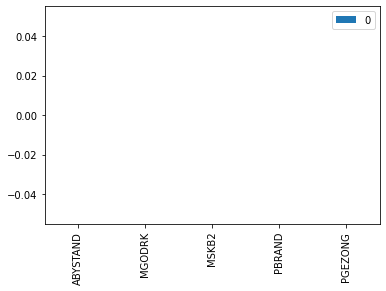

In [53]:
pd.DataFrame(importances[:5], index=[x for (_,x) in importances[:5]]).plot(kind = 'bar')